In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
patterns = {
    'A': np.array([[ 1, 1, 1, 1, 1],
                   [ 1,-1,-1,-1, 1],
                   [ 1, 1, 1, 1, 1],
                   [ 1,-1,-1,-1, 1],
                   [ 1,-1,-1,-1, 1]]),
    'B': np.array([[ 1, 1, 1, 1,-1],
                   [ 1,-1,-1,-1, 1],
                   [ 1, 1, 1, 1,-1],
                   [ 1,-1,-1,-1, 1],
                   [ 1, 1, 1, 1,-1]]),
    'J' : np.array([[ 1, 1, 1, 1, 1],
                    [-1,-1,-1, 1,-1],
                    [-1,-1,-1, 1,-1],
                    [1,-1,-1, 1,-1],
                    [ 1,1 ,1,-1,-1]])
}


In [3]:
def add_noise(pattern, noise_percentage):
    noise = np.random.choice([1, -1], size=pattern.shape, p=[1 - noise_percentage, noise_percentage])
    return np.where(noise == -1, pattern, noise)

def hopfield_model(patterns):
    num_features = patterns['A'].size
    num_patterns = len(patterns)
    weight_matrix = np.zeros((num_features, num_features))

    for pattern in patterns.values():
        pattern_vector = pattern.flatten()
        weight_matrix += np.outer(pattern_vector, pattern_vector)

    np.fill_diagonal(weight_matrix, 0)

    return weight_matrix

def retrieve_pattern(weight_matrix, pattern):
    while True:
        new_pattern = np.sign(np.dot(weight_matrix, pattern.flatten()))
        new_pattern = np.where(new_pattern >= 0, 1, -1).reshape(pattern.shape)
        if np.array_equal(new_pattern, pattern):
            break
        pattern = new_pattern
    return new_pattern

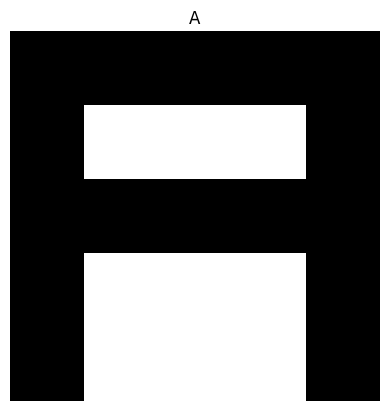

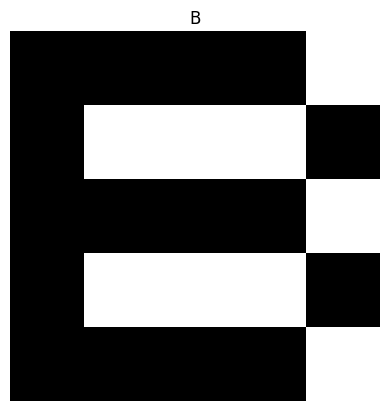

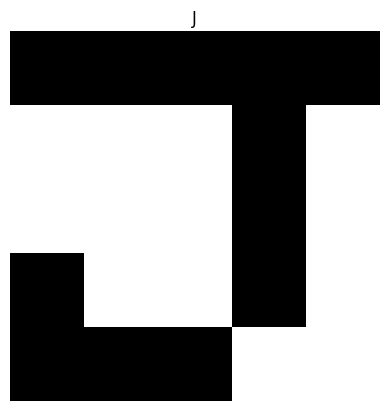

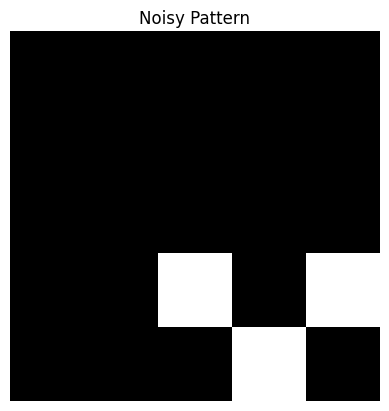

In [ ]:
def plot_pattern(pattern, title):
    plt.imshow(pattern, cmap='binary', vmin=-1, vmax=1)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Define a noisy pattern
noisy_pattern = add_noise(patterns['J'], 0.1)

plot_pattern(patterns['A'],'A')
plot_pattern(patterns['B'],'B')
plot_pattern(patterns['J'],'J')

plot_pattern(noisy_pattern, "Noisy Pattern")


weight_matrix = hopfield_model(patterns)

retrieved_pattern = retrieve_pattern(weight_matrix, noisy_pattern)

plot_pattern(retrieved_pattern, "Retrieved Pattern")
